In [1]:
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt 

In [2]:
def plot_classifier(classifier, X, y):
    # define ranges to plot the figure
    x_min, x_max = min(X[:,0]) - 1.0, max(X[:,0]) + 1.0
    y_min, y_max = min(X[:,1]) - 1.0, max(X[:,1]) + 1.0
    
    # denotes the step size that will be used in the mesh grid
    step_size = 0.01
    
    # define the mesh grid
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size),
                                     np.arange(y_min, y_max, step_size))
    
    # compute the classifier output
    mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])
    
    # reshape the array
    mesh_output = mesh_output.reshape(x_values.shape)
    
    # plot the output using a colored plot
    plt.figure()
    
    # choose a color scheme
    plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)
    
    # overlay the training points on the plot
    plt.scatter(X[:,0], X[:,1], c=y, s=80, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)
    
    # specify the boundaries of the figure
    plt.xlim(x_values.min(), x_values.max())
    plt.ylim(y_values.min(), y_values.max())
    
    # specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(min(X[:, 0])-1), int(max(X[:, 0])+1), 1.0)))
    plt.yticks((np.arange(int(min(X[:, 1])-1), int(max(X[:, 1])+1), 1.0)))
    
    plt.show()

In [3]:
input_file = 'Python-Machine-Learning-Cookbook/Chapter02/data_multivar.txt'
X = []
y = []
with open(input_file, 'r') as f:
    for line in f.readlines():
        data = [float(x) for x in line.split(',')]
        X.append(data[:-1])
        y.append(data[-1])
X = np.array(X)
y = np.array(y)


Accuracy of the classifier = 99.5%


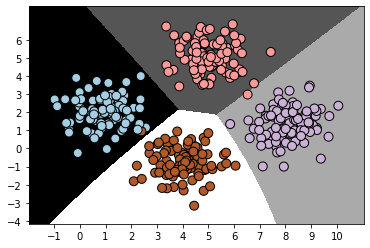

In [4]:
classifier_gaussiannb = GaussianNB()
classifier_gaussiannb.fit(X, y)
y_pred = classifier_gaussiannb.predict(X)
accuracy = 100.0 * (y == y_pred).sum() / X.shape[0]
print ("Accuracy of the classifier = {}%".format(round(accuracy, 2)))
plot_classifier(classifier_gaussiannb, X, y)

Accuracy of the classifier = 98.48%


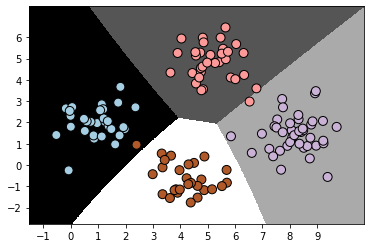

In [7]:
# Splitting the dataset into training and testing datasets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=5)
classifier_gaussiannb_new = GaussianNB()
classifier_gaussiannb_new.fit(X_train, y_train)
y_test_pred = classifier_gaussiannb_new.predict(X_test)
accuracy = 100.0 * (y_test == y_test_pred).sum() / X_test.shape[0]
print ("Accuracy of the classifier = {}%".format(round(accuracy, 2)))
plot_classifier(classifier_gaussiannb_new, X_test, y_test)


In [16]:
# Evaluating the accuracy using cross-validation
num_validations = 5
accuracy = model_selection.cross_val_score(classifier_gaussiannb,
                                          X, y, scoring='accuracy',
                                          cv=num_validations)
f1 = model_selection.cross_val_score(classifier_gaussiannb, X, y,
                                     scoring='f1_weighted', cv=num_validations)
precision = model_selection.cross_val_score(classifier_gaussiannb, X, y,
                                     scoring='precision_weighted', cv=num_validations)
recall = model_selection.cross_val_score(classifier_gaussiannb, X, y,
                                     scoring='recall_weighted', cv=num_validations)
print ("Precision: {}%".format(round(100*precision.mean(),2)))
print ("F1:        {}%".format(round(100*f1.mean(),2)))
print ("Accuracy:  {}%".format(round(100*accuracy.mean(),2)))
print ("Recall:    {}%".format(round(100*recall.mean(),2)))


Precision: 99.52%
F1:        99.5%
Accuracy:  99.5%
Recall:    99.5%
